<a href="https://colab.research.google.com/github/cheeya-agwl/Stock-Market-Price-Movement-Prediction/blob/main/ARIMA_linearRegression_K-mean_stock.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
dataset=pd.read_csv('info1.csv')

In [3]:
dataset

,Date,Open,High,Low,Close,Adj Close,Volume
0,11/27/2018,625.50,641.00,625.30,638.90,615.69,12285851
1,11/28/2018,640.95,668.70,640.00,666.40,642.19,17719890
2,11/29/2018,671.00,674.90,658.80,661.05,637.03,13399070
3,11/30/2018,661.00,672.00,660.95,667.45,643.20,10445773
4,12/3/2018,673.15,679.00,665.95,670.35,645.99,8260890
...,...,...,...,...,...,...,...
237,11/21/2019,715.50,721.45,710.50,713.25,713.25,9692973
238,11/22/2019,711.75,712.00,685.10,693.20,693.20,14415826
239,11/25/2019,693.35,705.15,693.20,698.10,698.10,7334511
240,11/26/2019,705.00,707.25,686.00,690.60,690.60,27252999


([<matplotlib.axis.XTick at 0x7fa0bcd0fd30>,
 [Text(0, 0, '11/27/2018'),
  Text(20, 0, '12/26/2018'),
  Text(40, 0, '1/23/2019'),
  Text(60, 0, '2/21/2019'),
  Text(80, 0, '3/25/2019'),
  Text(100, 0, '4/30/2019'),
  Text(120, 0, '5/29/2019'),
  Text(140, 0, '6/27/2019'),
  Text(160, 0, '7/25/2019'),
  Text(180, 0, '8/26/2019'),
  Text(200, 0, '9/25/2019'),
  Text(220, 0, '10/27/2019'),
  Text(240, 0, '11/26/2019')])

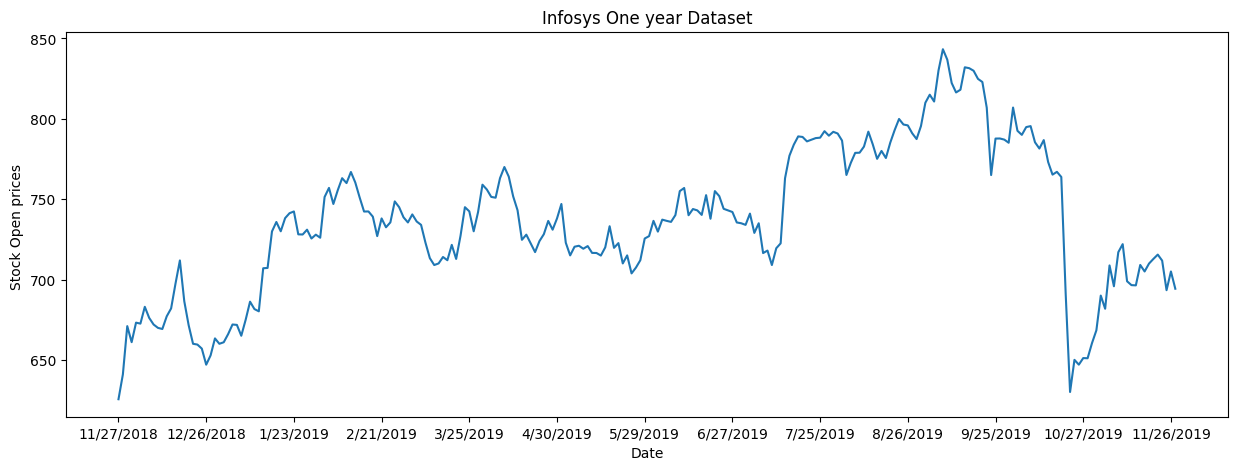

In [4]:
plt.figure(figsize=(15,5))
plt.title('Infosys One year Dataset')
plt.xlabel('Date')
plt.ylabel('Stock Open prices ')
plt.plot(dataset['Open'])
plt.xticks(np.arange(0,241,20),dataset['Date'][0:241:20])

In [5]:
df=pd.DataFrame({"HL":(dataset['High']+dataset['Low'])/2})
df

,HL
0,633.150
1,654.350
2,666.850
3,666.475
4,672.475
...,...
237,715.975
238,698.550
239,699.175
240,696.625


In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pandas.plotting import lag_plot
from pandas import datetime
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error

<ipython-input-14-bc8c30725165>:5: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  from pandas import datetime


In [15]:
dataset.isnull().any()

Date         False
Open         False
High         False
Low          False
Close        False
Adj Close    False
Volume       False
dtype: bool

Text(0.5, 1.0, 'Infosys stock data')

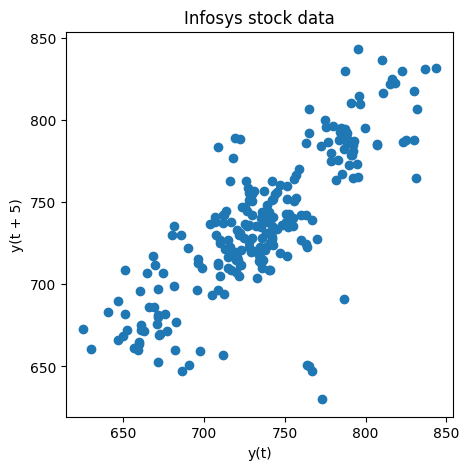

In [16]:
plt.figure(figsize=(5,5))#to set the size of figure
lag_plot(dataset['Open'],lag=5)
plt.title("Infosys stock data")

In [17]:
a=int(len(dataset)*0.8)
a

193

In [18]:
train_set,test_set=dataset[0:a],dataset[a:]
train_set

,Date,Open,High,Low,Close,Adj Close,Volume
0,11/27/2018,625.50,641.00,625.30,638.90,615.69,12285851
1,11/28/2018,640.95,668.70,640.00,666.40,642.19,17719890
2,11/29/2018,671.00,674.90,658.80,661.05,637.03,13399070
3,11/30/2018,661.00,672.00,660.95,667.45,643.20,10445773
4,12/3/2018,673.15,679.00,665.95,670.35,645.99,8260890
...,...,...,...,...,...,...,...
188,9/6/2019,843.30,847.00,835.05,840.15,821.06,6106841
189,9/9/2019,836.80,840.30,827.55,829.10,810.26,4377870
190,9/11/2019,822.30,828.55,814.15,820.10,801.47,7981036
191,9/12/2019,816.40,819.85,810.85,816.40,797.85,4400017


([<matplotlib.axis.XTick at 0x7fa0abb89e70>,
 [Text(0, 0, '11/27/2018'),
  Text(25, 0, '1/2/2019'),
  Text(50, 0, '2/6/2019'),
  Text(75, 0, '3/15/2019'),
  Text(100, 0, '4/30/2019'),
  Text(125, 0, '6/6/2019'),
  Text(150, 0, '7/11/2019'),
  Text(175, 0, '8/19/2019'),
  Text(200, 0, '9/25/2019'),
  Text(225, 0, '11/4/2019')])

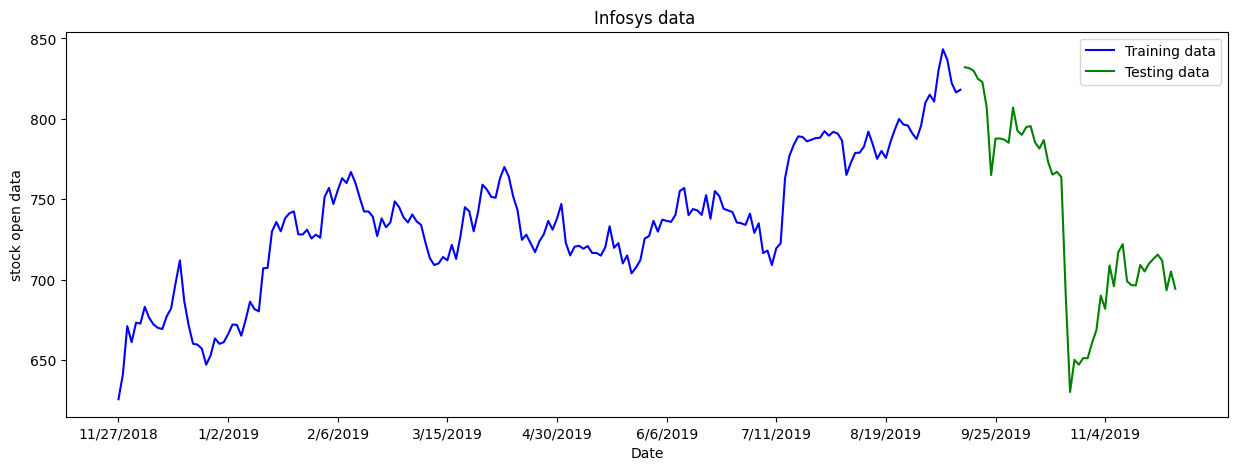

In [19]:
plt.figure(figsize=(15,5))
plt.title("Infosys data ")
plt.xlabel("Date")
plt.ylabel("stock open data")
plt.plot(train_set['Open'],color='blue',label='Training data')
plt.plot(test_set['Open'],color='green',label='Testing data')
plt.legend()
plt.xticks(np.arange(0,241,25),dataset['Date'][0:241:25])

In [20]:
def smape(y_true,y_pred):
    return np.mean((np.abs(y_true-y_pred)*200/(np.abs(y_true)+np.abs(y_pred))))

In [22]:
train_val=train_set['Open'].values
test_val=test_set['Open'].values
history=[x for x in train_val]
print(type(history))#this is list of training data
prediction=list()
prediction
for t in range(len(test_val)):
    model=ARIMA(history,order=(3,1,0))
    model_fit=model.fit()
    output=model_fit.forecast()
    yhat=output[0]
    prediction.append(yhat)
    obs=test_val[t]
    history.append(obs)
error=mean_squared_error(test_val,prediction)
print("Mean squared error : %0.3f",error)
error2=smape(test_val,prediction)
print("Symmetric mean absolute percentage error: %0.3f",error2)

<class 'list'>
Mean squared error : %0.3f 362.2046016957509
Symmetric mean absolute percentage error: %0.3f 1.7135662391809605


In [23]:
print('Testing Mean Squared Error: %.3f' % error)
print("Symmetric mean absolute percentage error: %0.3f" %error2)

Testing Mean Squared Error: 362.205
Symmetric mean absolute percentage error: 1.714


In [24]:
df1=pd.DataFrame({'Actual':test_val,'Predicted':prediction})
df1


,Actual,Predicted
0,832.05,818.165082
1,831.50,832.910567
2,829.90,831.614568
3,824.85,829.579591
4,822.90,824.578308
5,806.90,822.772121
6,765.00,806.093715
7,787.70,760.942051
8,787.75,788.713991
9,787.05,788.086221


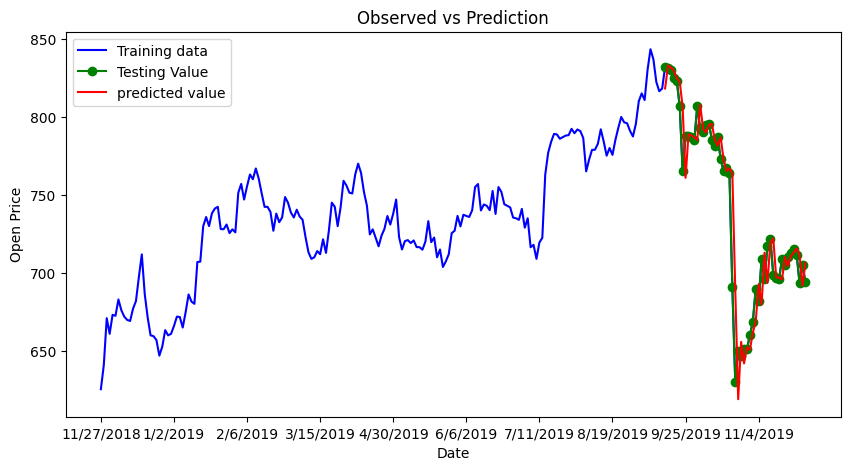

In [25]:
plt.figure(figsize=(10,5))
plt.title("Observed vs Prediction")
plt.xlabel('Date')
plt.ylabel('Open Price')
plt.plot(dataset['Open'],color='blue',label='Training data')
plt.plot(test_set.index,test_set['Open'],'green',marker='o',label='Testing Value')#since training and testing was overlapping therfore marker was used
plt.plot(test_set.index,prediction,'red',label='predicted value')
plt.xticks(np.arange(0,241,25), dataset['Date'][0:241:25])
plt.legend()

In [26]:
n=int(len(df1))
242-193

49

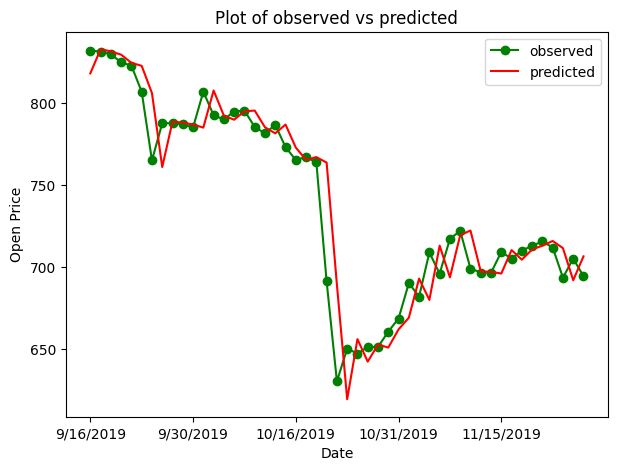

In [27]:
plt.figure(figsize=(7,5))
plt.title("Plot of observed vs predicted")
plt.xlabel("Date")
plt.ylabel('Open Price')
plt.plot(test_set.index,test_val,"green",label="observed",marker='o')
plt.plot(test_set.index,prediction,"red",label="predicted")
plt.xticks(np.arange(193,242,10),dataset['Date'][193:242:10])
plt.legend()

In [28]:
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  241
Model:                 ARIMA(3, 1, 0)   Log Likelihood                -936.196
Date:                Fri, 30 Jun 2023   AIC                           1880.392
Time:                        17:48:59   BIC                           1894.314
Sample:                             0   HQIC                          1886.002
                                - 241                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0849      0.035      2.425      0.015       0.016       0.153
ar.L2         -0.0239      0.059     -0.402      0.688      -0.140       0.093
ar.L3          0.0129      0.096      0.134      0.893      -0.176       0.202
sigma2       143.1249      6.942     20.616      0.000     129.518     156.732
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):               573.26
Prob(Q):                              0.98   Prob(JB):                         0.00
Heteroskedasticity (H):               2.32   Skew:                            -1.14
Prob(H) (two-sided):                  0.00   Kurtosis:                        10.22
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [30]:
#dataset['Date']=pd.to_datetime(dataset.Date,format='%m/%d/%Y')
date_val=dataset.index
#df.index=df['Date']
dataset.sort_index(ascending=True,axis=0)
data=pd.DataFrame({"Date":date_val,'Open':dataset['Open']})

In [31]:
dataset

,Date,Open,High,Low,Close,Adj Close,Volume
0,11/27/2018,625.50,641.00,625.30,638.90,615.69,12285851
1,11/28/2018,640.95,668.70,640.00,666.40,642.19,17719890
2,11/29/2018,671.00,674.90,658.80,661.05,637.03,13399070
3,11/30/2018,661.00,672.00,660.95,667.45,643.20,10445773
4,12/3/2018,673.15,679.00,665.95,670.35,645.99,8260890
...,...,...,...,...,...,...,...
237,11/21/2019,715.50,721.45,710.50,713.25,713.25,9692973
238,11/22/2019,711.75,712.00,685.10,693.20,693.20,14415826
239,11/25/2019,693.35,705.15,693.20,698.10,698.10,7334511
240,11/26/2019,705.00,707.25,686.00,690.60,690.60,27252999


In [32]:
#now we will split data into training and testing data set
#80% training rest 20% testing
a=int(len(dataset)*0.8)
train=data[0:a]
test=data[a:]
test

,Date,Open
193,193,832.05
194,194,831.50
195,195,829.90
196,196,824.85
197,197,822.90
198,198,806.90
199,199,765.00
200,200,787.70
201,201,787.75
202,202,787.05


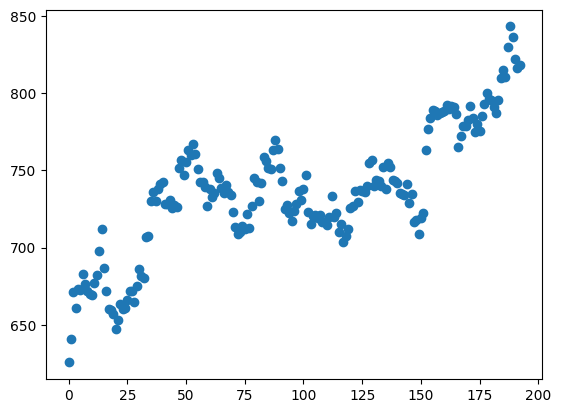

In [33]:
x_train=train['Date'].values.reshape(-1,1)
y_train=train['Open'].values.reshape(-1,1)
x_test=test['Date'].values.reshape(-1,1)
y_test=test['Open'].values.reshape(-1,1)
plt.scatter(x_train,y_train)
#prices = df['Close'].tolist()
#dates = df.index.tolist()
#x_train = np.reshape(x_train, (len(dates), 1))
#y_train = np.reshape(prices, (len(prices), 1))

In [34]:
model=LinearRegression()
dates=data['Date'].values.reshape(-1,1)
Open=data['Open'].values.reshape(-1,1)
model.fit(dates,Open)
#model.fit(x_train,y_train)
y_pred=model.predict(x_test)
#df1=pd.DataFrame(y_test,y_pred)
#df1

In [35]:
df1=pd.DataFrame({'Actual':y_test.flatten(),'Predicted':y_pred.flatten()})
#df1=pd.DataFrame({'Actual':test_val,'Predicted':prediction})
df1

,Actual,Predicted
0,832.05,756.806026
1,831.50,757.091285
2,829.90,757.376543
3,824.85,757.661801
4,822.90,757.947060
5,806.90,758.232318
6,765.00,758.517577
7,787.70,758.802835
8,787.75,759.088093
9,787.05,759.373352


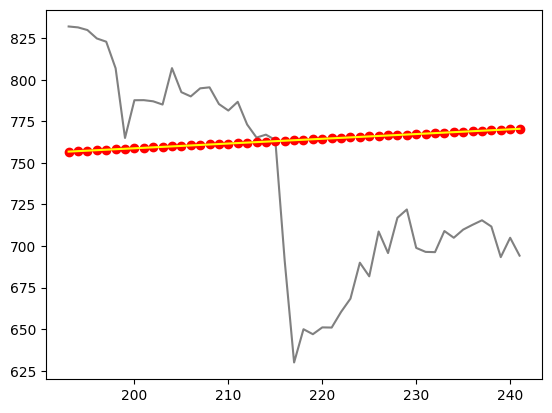

In [36]:
plt.plot(x_test,y_test,color='grey')
plt.plot(x_test,y_pred,color='red',marker='o')
plt.plot(x_test,model.predict(x_test),color='yellow')

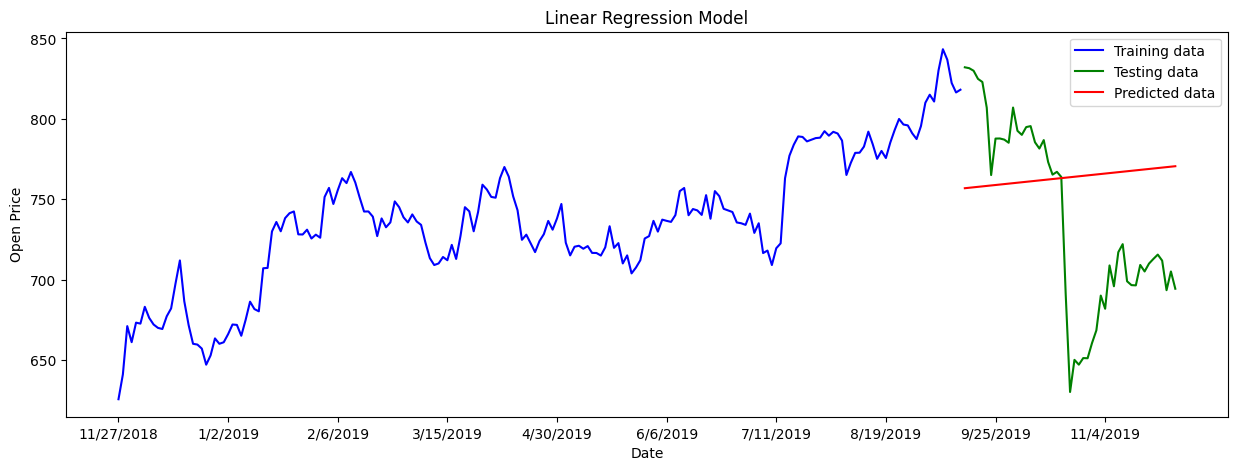

In [37]:
plt.figure(figsize=(15,5))
plt.title("Linear Regression Model")
plt.xlabel("Date")
plt.ylabel("Open Price")
plt.plot(train.index,y_train,"blue",label='Training data')
plt.plot(test.index,y_test,"green",label='Testing data')
plt.plot(test.index,y_pred,"red",label='Predicted data')
plt.xticks(np.arange(0,242,25),dataset['Date'][0:242:25])
#plt.plot(test.index,regressor.predict(x_test),"yellow")
plt.legend()

In [38]:
r_sq = model.score(x_train, y_train)
print('coefficient of determination:', r_sq)
print('Slope of model: ',model.coef_)
print('Intercept of model: ',model.intercept_)

coefficient of determination: 0.4411117278505826
Slope of model:  [[0.28525838]]
Intercept of model:  [701.75115805]


In [39]:
err=metrics.mean_squared_error(y_test,y_pred)
print("Mean squared error:  ",err)

Mean squared error:   4320.1200433736385


In [40]:
# k nearest neighbour
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn import neighbors
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))

In [41]:
dataset['Date']=pd.to_datetime(dataset.Date,format='%m-%d-%Y')
dataset["Date"]=pd.to_datetime(dataset.Date,format="%m-%d-%Y")
dataset=dataset.sort_index(ascending=True,axis=0)
data=pd.DataFrame({"Date":dataset.index,'Open':dataset['Open']})
data

ValueError: ignored

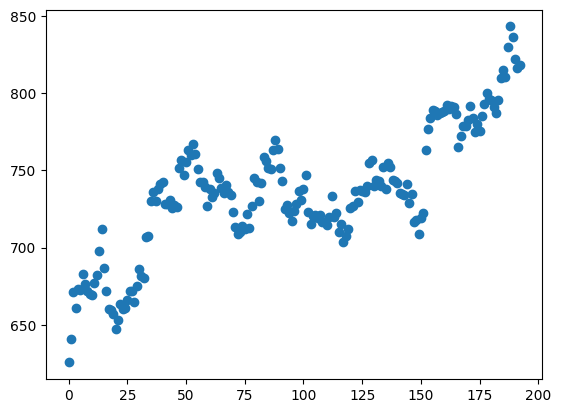

In [42]:
train=data[0:int(len(data)*0.8)]
test=data[int(len(data)*0.8):]
x_train=train['Date'].values.reshape(-1,1)
y_train=train['Open'].values.reshape(-1,1)
x_test=test['Date'].values.reshape(-1,1)
y_test=test['Open'].values.reshape(-1,1)
plt.scatter(x_train,y_train)

In [43]:
x_train_scaled=scaler.fit_transform(x_train)
xtrain=pd.DataFrame(x_train_scaled)
x_test_scaled=scaler.fit_transform(x_test)
xtest=pd.DataFrame(x_test_scaled)

In [44]:
# using gridsearch to find the best value of k

params = {'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]}
knn = neighbors.KNeighborsRegressor()
model = GridSearchCV(knn, params, cv=5)

# fitting the model and predicting
model.fit(xtrain, y_train)
preds = model.predict(xtest)

In [ ]:
plt.figure(figsize=(15,5))
plt.title("K nearest neighbour Model")
plt.xlabel("Date")
plt.ylabel("Open Price")
plt.plot(train.index,y_train,"blue",label='Training data')
plt.plot(test.index,y_test,"green",label='testing data')
plt.plot(test.index,preds,"red",label='Predicted data')
plt.xticks(np.arange(0,242,20),dataset['Date'][0:242:20])
plt.legend()

In [45]:
err=metrics.mean_squared_error(y_test,preds)
errr2=metrics.mean_squared_error(y_train,model.predict(xtrain))
print("Testing error",err)
print("Training error",errr2)

Testing error 7384.2091213151925
Training error 21.652777777777803


In [46]:
#error values
xhat=model.predict(xtrain)
dat2=pd.DataFrame({'Actual':y_train.flatten(),'Predicted':xhat.flatten()})#on testing
dat1=pd.DataFrame({'Actual':y_test.flatten(),'Predicted':preds.flatten()})#on testing
dat2

,Actual,Predicted
0,625.50,645.816667
1,640.95,645.816667
2,671.00,657.650000
3,661.00,668.383333
4,673.15,668.900000
...,...,...
188,843.30,836.733333
189,836.80,834.133333
190,822.30,825.166667
191,816.40,818.933333
